# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_breast_cancer  # Only removed since we are using your COVID dataset now

time: 746 µs (started: 2025-04-25 02:25:28 +00:00)


# **Load The Dataset**

In [ ]:
df = pd.read_excel("dataset.xlsx")  # Replace with your actual file name
df

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0     44477f75e8169d2                    13               negative   
1     126e9dd13932f68                    17               negative   
2     a46b4402a0e5696                     8               negative   
3     f7d619a94f97c45                     5               negative   
4     d9e41465789c2b5                    15               negative   
...               ...                   ...                    ...   
5639  ae66feb9e4dc3a0                     3               positive   
5640  517c2834024f3ea                    17               negative   
5641  5c57d6037fe266d                     4               negative   
5642  c20c44766f28291                    10               negative   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   ...  \
0            NaN        NaN                    NaN  ...   
1      -0.022340  -0.517413               0.010677  ...   
2            NaN        NaN                    NaN  ...   
3            NaN        NaN                    NaN  ...   
4            NaN        NaN                    NaN  ...   
...          ...        ...                    ...  ...   
5639         NaN        NaN                    NaN  ...   
5640         NaN        NaN                    NaN  ...   
5641         NaN        NaN                    NaN  ...   
5642         NaN        NaN                    NaN  ...   
5643    0.541564  -0.906829              -0.325903  ...   

      Hb saturation (arterial blood gases)  \
0                                      NaN   
1                                     

time: 970 ms (started: 2025-04-25 02:26:27 +00:00)


# **Dataset Information**

In [ ]:
df.info()
print()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB



Patient age quantile  Patient addmited to regular ward (1=yes, 0=no)  \
count           5644.000000                                     5644.000000   
mean               9.318391                                        0.013997   
std                5.777903                                        0.117489   
min                0.000000                                        0.000000   
25%                4.000000                                        0.000000   
50%                9.000000                                        0.000000   
75%               14.000000                                        0.000000   
max               19.000000                                        1.000000   

       Patient addmited to semi-intensive unit (1=yes, 0=no)  \
count                                        5644.000000       
mean                                            0.008859       
std                                             0.093713       
min                                             0.000000       
25%                                             0.000000       
50%                                             0.000000       
75%                                             0.000000       
max                                             1.000000       

       Patient addmited to intensive care unit (1=yes, 0=no)    Hematocrit  \
count                                        5644.000000      6.030000e+02   
mean                                            0.007264     -2.186214e-09   
std                                             0.084929      1.000830e+00   
min                                             0.000000     -4.501420e+00   
25%                                             0.000000     -5.188074e-01   
50%                                             0.000000      5.340703e-02   
75%                                             0.000000      7.171751e-01   
max                                             1.000000      2.662704e+00   

         Hemoglobin     Platelets  Mean platelet volume   Red blood Cells  \
count  6.030000e+02  6.020000e+02           5.990000e+02     6.020000e+02   
mean  -1.601319e-08 -3.535004e-10           7.438142e-09     8.424447e-09   
std    1.000830e+00  1.000832e+00           1.000836e+00     1.000832e+00   
min   -4.345603e+00 -2.552426e+00          -2.457575e+00    -3.970608e+00   
25%   -5.862439e-01 -6.053457e-01          -6.624832e-01    -5.679496e-01   
50%    4.031596e-02 -1.217160e-01          -1.015171e-01     1.385207e-02   
75%    7.295320e-01  5.314981e-01           6.838353e-01     6.661759e-01   
max    2.671868e+00  9.532034e+00           3.713052e+00     3.645706e+00   

        Lymphocytes  ...  Hb saturation (arterial blood gases)  \
count  6.020000e+02  ...                          2.700000e+01   
mean  -7.866736e-09  ...                         -1.379737e-10   
std    1.000832e+00  ...                          1.019049e+00   
min   -1.865070e+00  ...                         -1.999560e+00   
25%   -7.307069e-01  ...                         -1.122574e+00   
50%   -1.426696e-02  ...                          2.677689e-01   
75%    5.976919e-01  ...                          7.383496e-01   
max    3.764100e+00  ...                          1.337265e+00   

       pCO2 (arterial blood gas analysis)  \
count                        2.700000e+01   
mean                         8.416397e-09   
std                          1.019049e+00   
min                         -1.244817e+00   
25%                         -5.348102e-01   
50%                         -2.120799e-01   
75%                          2.305214e-02   
max                          3.236524e+00   

       Base excess (arterial blood gas analysis)  \
count                               2.700000e+01   
mean                               -1.655685e-09   
std                                 1.019049e+00   
min                                -3.082674e+00   
25%                                -3.308668e-01   
50%     

time: 129 ms (started: 2025-04-25 02:26:32 +00:00)


In [ ]:
print(df.isnull().sum())

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64
time: 12 ms (started: 2025-04-25 02:26:39 +00:00)


In [ ]:
new_df = df.dropna(axis=1, thresh=int(0.2 * len(df)))  # Keep columns with at least 70% valid data

time: 12.8 ms (started: 2025-04-25 02:26:43 +00:00)


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 23 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Patient ID                                             5644 non-null   object
 1   Patient age quantile                                   5644 non-null   int64 
 2   SARS-Cov-2 exam result                                 5644 non-null   object
 3   Patient addmited to regular ward (1=yes, 0=no)         5644 non-null   int64 
 4   Patient addmited to semi-intensive unit (1=yes, 0=no)  5644 non-null   int64 
 5   Patient addmited to intensive care unit (1=yes, 0=no)  5644 non-null   int64 
 6   Respiratory Syncytial Virus                            1354 non-null   object
 7   Influenza A                                            1354 non-null   object
 8   Influenza B                                            135

In [ ]:
# Load dataset
df = pd.read_excel("dataset.xlsx")  # Replace with actual file name

# Convert target variable 'SARS-Cov-2 exam result' to numeric (1 for positive, 0 for negative)
df["SARS-Cov-2 exam result"] = df["SARS-Cov-2 exam result"].map({"positive": 1, "negative": 0})

# Identify and remove columns with excessive missing values
df = df.dropna(axis=1, thresh=int(0.2 * len(df)))  # Keep columns with at least 70% valid data

# Separate numerical and categorical columns
numeric_cols = df.select_dtypes(include=["number"]).columns
categorical_cols = df.select_dtypes(exclude=["number"]).columns

# Impute missing values in numerical columns using mean strategy
imputer = SimpleImputer(strategy="mean")
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Handle categorical columns separately (fill with mode)
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])  # Filling missing categorical values

# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop("SARS-Cov-2 exam result", axis=1))

y = df["SARS-Cov-2 exam result"]

time: 3.2 s (started: 2025-04-25 02:32:43 +00:00)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

time: 637 ms (started: 2025-04-25 02:35:10 +00:00)


Test accuracy: 0.9096545615589017


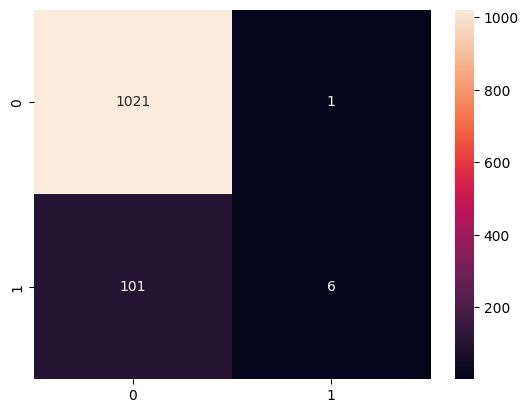

time: 47.3 s (started: 2025-04-25 02:35:27 +00:00)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)

print(f'Test accuracy: {accuracy_score(y_test, y_pred)}')

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Define individual classifiers
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()
model4 = MLPClassifier()

# Use VotingClassifier to create an ensemble
from sklearn.ensemble import VotingClassifier

my_ensemble = VotingClassifier(estimators=[
    ('dt', model1), ('lr', model2), ('knn', model3), ('mlp', model4)
], voting='hard')

my_ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier()),
                             ('mlp', MLPClassifier())])

time: 1min 29s (started: 2025-04-25 02:36:18 +00:00)


In [ ]:
for model, name in zip([model1, model2, model3, model4], ["Decision Tree", "Logistic Regression", "KNN", "MLP"]):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Test Accuracy: {accuracy_score(y_test, y_pred)}")

Decision Tree Test Accuracy: 0.9096545615589017
Logistic Regression Test Accuracy: 0.9052258635961028
KNN Test Accuracy: 0.9096545615589017
MLP Test Accuracy: 0.10097431355181577
time: 1min 22s (started: 2025-04-25 02:37:54 +00:00)


In [ ]:
y_pred = my_ensemble.predict(X_test)
print(f"Ensemble Model Test Accuracy: {accuracy_score(y_test, y_pred)}")

Ensemble Model Test Accuracy: 0.9096545615589017
time: 3.65 s (started: 2025-04-25 02:39:20 +00:00)


In [ ]:
from sklearn.ensemble import BaggingClassifier

clf_base = DecisionTreeClassifier(random_state=1)
clf_bag = BaggingClassifier(estimator=clf_base, n_estimators=1, random_state=1)
clf_bag.fit(X_train, y_train)

bag_pred = clf_bag.predict(X_test)
print(f"Bagging Test Accuracy: {accuracy_score(y_test, bag_pred)}")

Bagging Test Accuracy: 0.9096545615589017
time: 16.8 s (started: 2025-04-25 03:01:00 +00:00)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf_ada = AdaBoostClassifier(estimator=clf_base, n_estimators=1, random_state=1)
clf_ada.fit(X_train, y_train)

ada_pred = clf_ada.predict(X_test)
print(f"AdaBoost Test Accuracy: {accuracy_score(y_test, ada_pred)}")

AdaBoost Test Accuracy: 0.9087688219663419
time: 49.3 s (started: 2025-04-25 03:01:30 +00:00)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

clf_gdb = GradientBoostingClassifier(n_estimators=1)
models = [
    ("Base Model", clf_base),
    ("AdaBoost", clf_ada),
    ("Bagging", clf_bag),
    ("Random Forest", clf_rf),
    ("Gradient Boosting", clf_gdb)
]

for name, model in models:
    results = cross_val_score(model, X_scaled, y, cv=2)
    print(f"{name}: {np.mean(results)}")

Base Model: 0.9029057406094968
AdaBoost: 0.9032600992204111
Bagging: 0.9030829199149539
Random Forest: 0.9034372785258682
Gradient Boosting: 0.9011339475549256
time: 1min 25s (started: 2025-04-25 03:12:32 +00:00)
